In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
filepath = "project_1/df_new.csv"
df_new = pd.read_csv(filepath)
df_new.head()

,Age,Hours per day,While working,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Latin,156.0,Rarely,Never,Rarely,Never,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,1.5,Yes,Rock,119.0,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,4.0,No,Video game music,132.0,Never,Never,Very frequently,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,R&B,107.0,Never,Never,Rarely,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [5]:
# Print the ages to check if any missing value.
df_new["Age"].unique()

array([18., 63., 61., 21., 19., nan, 17., 16., 15., 14., 20., 26., 23.,
       37., 36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43.,
       28., 34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56.,
       59., 10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55.,
       48., 71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [7]:
# Look for the average age to replace the missing age
df_new["Age"].mean()

25.206802721088437

In [11]:
# Identify the missing age value and replace it with the average.
missing_age = df_new[df_new["Age"].isnull()].index[0]
df_new.loc[missing_age, "Age"] = 25

In [13]:
df_new["Age"].unique()

array([18., 63., 61., 21., 19., 25., 17., 16., 15., 14., 20., 26., 23.,
       37., 36., 24., 22., 42., 32., 29., 41., 31., 33., 30., 43., 28.,
       34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56., 59.,
       10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55., 48.,
       71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [15]:
question2_cleaned_df = df_new.copy()

In [21]:
# Make a new DF with the columns need it for question 2
cols = ["Age", "Fav genre", "Anxiety", "Depression", "Insomnia","OCD"]

question2_df = question2_cleaned_df[cols]
question2_df.head()

,Age,Fav genre,Anxiety,Depression,Insomnia,OCD
0,18.0,Latin,3.0,0.0,1.0,0.0
1,63.0,Rock,7.0,2.0,2.0,1.0
2,18.0,Video game music,7.0,7.0,10.0,2.0
3,61.0,Jazz,9.0,7.0,3.0,3.0
4,18.0,R&B,7.0,2.0,5.0,9.0


In [22]:
# Define the bin edges for age groups
bins = [0, 30, 40, 50, 60, 100]
group_names = ['<20', '20-39', '40-49', '50-59', '60+']

In [26]:
# Create a new column in the DataFrame with age groups
question2_df['Age_Group'] = pd.cut(question2_df['Age'], bins=bins, labels=group_names)
question2_df.head()

C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_12028\3863332616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question2_df['Age_Group'] = pd.cut(question2_df['Age'], bins=bins, labels=group_names)


,Age,Fav genre,Anxiety,Depression,Insomnia,OCD,Age_Group
0,18.0,Latin,3.0,0.0,1.0,0.0,<20
1,63.0,Rock,7.0,2.0,2.0,1.0,60+
2,18.0,Video game music,7.0,7.0,10.0,2.0,<20
3,61.0,Jazz,9.0,7.0,3.0,3.0,60+
4,18.0,R&B,7.0,2.0,5.0,9.0,<20


In [29]:
#  Calculate averages for age group.
anxiety_range_avg = question2_cleaned_df.groupby(["Age_Group"])["Anxiety"].mean()
depression_range_avg = question2_cleaned_df.groupby(["Age_Group"])["Depression"].mean()
insomnia_range_avg = question2_cleaned_df.groupby(["Age_Group"])["Insomnia"].mean()
OCD_range_avg = question2_cleaned_df.groupby(["Age_Group"])["OCD"].mean()

C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_12028\3102805032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_range_avg = question2_cleaned_df.groupby(["Age_Group"])["Anxiety"].mean()
C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_12028\3102805032.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depression_range_avg = question2_cleaned_df.groupby(["Age_Group"])["Depression"].mean()
C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_12028\3102805032.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

In [33]:
# Assembly into DataFrame (MI = Mental Illness)
MI_AGE_AVR = pd.DataFrame(
    {"Avg_Anxiety_By_Age": anxiety_range_avg,
     "Avg_Depression_By_Age": depression_range_avg,
     "Avg_Insomnia_By_Age": insomnia_range_avg,
     "Avg_OCD_By_Age": OCD_range_avg,       
    }   
)
MI_AGE_AVR

,Avg_Anxiety_By_Age,Avg_Depression_By_Age,Avg_Insomnia_By_Age,Avg_OCD_By_Age
Age_Group,,,,
<20,6.046848,4.957411,3.668654,2.780239
20-39,5.723684,5.000000,4.328947,2.605263
40-49,5.500000,4.538462,4.500000,1.846154
50-59,2.730769,2.038462,3.269231,1.461538
60+,4.666667,3.285714,3.190476,1.190476


In [ ]:
for bars in [bar1, bar2, bar3, bar4]:
    for bar, data_value in zip(bars, data):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{data_value:.2f}', ha='center', va='center', color='white')

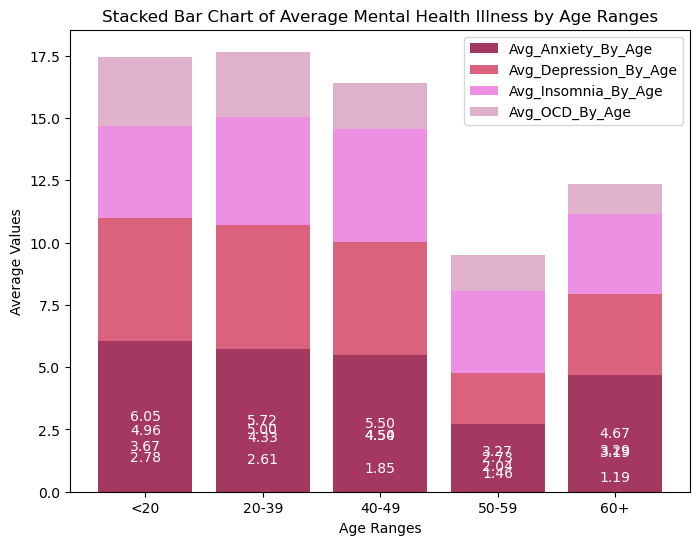

In [61]:
# Create a stacked bar plot to compare the age group with the Mental Illness
categories = MI_AGE_AVR.index
data = MI_AGE_AVR.values.T

plt.figure(figsize=(8, 6))
bar1 = plt.bar(categories, data[0], label="Avg_Anxiety_By_Age", color="#A53860")
bar2 = plt.bar(categories, data[1], bottom=data[0], label="Avg_Depression_By_Age", color="#DA627D")
bar3 = plt.bar(categories, data[2], bottom=data[0] + data[1], label="Avg_Insomnia_By_Age", color="#ED90E3")
bar4 = plt.bar(categories, data[3], bottom=data[0] + data[1] + data[2], label="Avg_OCD_By_Age", color="#E0B1CB")

for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', color='white')

plt.xlabel("Age Ranges")
plt.ylabel("Average Values")
plt.title("Stacked Bar Chart of Average Mental Health Illness by Age Ranges")
plt.legend()
plt.show()
